<a href="https://colab.research.google.com/github/MAL3X-01/DS-Unit-2-Applied-Modeling/blob/master/module1-log-linear-regression/log_linear_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#!pip install category_encoders

     |████████████████████████████████| 92kB 3.3MB/s 


# Assignment

- Start a clean notebook.
-Get the Caterpillar data from Kaggle.
-Do train/validate/test split.
-Select features from train_set.csv, tube.csv, and at least one more file.
-Fit a model.
-Get your validation RMSLE (or RMSE with log-transformed targets).
-Submit your predictions to the Kaggle competition.
-Commit your notebook to your fork of the GitHub repo.

## Retrieving Kaggle Data

In [1]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip

--2019-07-22 19:33:27--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 823789 (804K) [application/zip]
Saving to: ‘caterpillar-tube-pricing.zip’

caterpillar-tube-pr 100%[===================>] 804.48K  --.-KB/s    in 0.07s   

2019-07-22 19:33:27 (10.6 MB/s) - ‘caterpillar-tube-pricing.zip’ saved [823789/823789]



In [2]:
!ls *.zip

caterpillar-tube-pricing.zip


In [3]:
!unzip caterpillar-tube-pricing.zip

Archive:  caterpillar-tube-pricing.zip
  inflating: sample_submission.csv   
  inflating: data.zip                


In [4]:
!unzip data.zip

Archive:  data.zip
   creating: competition_data/
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.csv  
  inflating: competition_data/type_connection.csv  
  i

### Getting File Names & Shape

In [5]:
from glob import glob
import pandas as pd

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)

competition_data/type_end_form.csv (8, 2)
competition_data/comp_elbow.csv (178, 16)
competition_data/tube_end_form.csv (27, 2)
competition_data/type_connection.csv (14, 2)
competition_data/comp_adaptor.csv (25, 20)
competition_data/bill_of_materials.csv (21198, 17)
competition_data/comp_sleeve.csv (50, 10)
competition_data/comp_straight.csv (361, 12)
competition_data/comp_hfl.csv (6, 9)
competition_data/components.csv (2048, 3)
competition_data/comp_float.csv (16, 7)
competition_data/comp_threaded.csv (194, 32)
competition_data/test_set.csv (30235, 8)
competition_data/comp_nut.csv (65, 11)
competition_data/tube.csv (21198, 16)
competition_data/train_set.csv (30213, 8)
competition_data/specs.csv (21198, 11)
competition_data/comp_other.csv (1001, 3)
competition_data/type_component.csv (29, 2)
competition_data/comp_boss.csv (147, 15)
competition_data/comp_tee.csv (4, 14)


## Read CSV

In [71]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

print(trainval.shape, test.shape)

(30213, 8) (30235, 8)


In [72]:
trainval.isnull().sum()

tube_assembly_id      0
supplier              0
quote_date            0
annual_usage          0
min_order_quantity    0
bracket_pricing       0
quantity              0
cost                  0
dtype: int64

In [73]:
tube = pd.read_csv('competition_data/tube.csv')
bom = pd.read_csv('competition_data/bill_of_materials.csv')

print(tube.shape, bom.shape)
tube.head()

(21198, 16) (21198, 17)


,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [64]:
tube.isnull().sum()

tube_assembly_id      0
material_id         279
diameter              0
wall                  0
length                0
num_bends             0
bend_radius           0
end_a_1x              0
end_a_2x              0
end_x_1x              0
end_x_2x              0
end_a                 0
end_x                 0
num_boss              0
num_bracket           0
other                 0
dtype: int64

In [65]:
bom.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
bom.isnull().sum()

tube_assembly_id        0
component_id_1       2049
quantity_1           2049
component_id_2       6412
quantity_2           6412
component_id_3      16407
quantity_3          16400
component_id_4      20591
quantity_4          20590
component_id_5      21106
quantity_5          21106
component_id_6      21172
quantity_6          21172
component_id_7      21191
quantity_7          21191
component_id_8      21197
quantity_8          21197
dtype: int64

## Merge Tube/Bill of Material to Train

In [74]:
tube = tube.merge(bom, on='tube_assembly_id')
trainval = trainval.merge(tube, on='tube_assembly_id')
test = test.merge(tube, on='tube_assembly_id')

trainval.shape, test.shape, tube.shape

((30213, 39), (30235, 39), (21198, 32))

In [76]:
trainval.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Datetime/ Checking if they have the same ammount TA ID

In [0]:
trainval['quote_date'] = pd.to_datetime(trainval['quote_date'], infer_datetime_format=True)
test['quote_date'] = pd.to_datetime(test['quote_date'], infer_datetime_format=True)

In [78]:
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
test_tube_assemblies = test['tube_assembly_id'].unique()
len(trainval_tube_assemblies), len(test_tube_assemblies)

(8855, 8856)

## Train/Test Split

In [0]:
from sklearn.model_selection import train_test_split
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=40
)

In [80]:
len(train_tube_assemblies), len(val_tube_assemblies)

(6641, 2214)

In [81]:
train = trainval[trainval.tube_assembly_id.isin(train_tube_assemblies)]
val = trainval[trainval.tube_assembly_id.isin(val_tube_assemblies)]
train.shape, val.shape, trainval.shape

((22516, 39), (7697, 39), (30213, 39))

## Begin with Baseline

In [82]:
train.describe()

,annual_usage,min_order_quantity,quantity,cost,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8
count,22516.000000,22516.000000,22516.000000,22516.000000,22516.000000,22516.000000,22516.000000,22516.000000,22516.000000,22516.000000,22516.000000,22516.000000,21422.000000,15817.000000,5436.000000,614.000000,45.000000,18.000000,7.0,3.0
mean,124.712782,2.175298,38.305738,13.554021,17.385419,1.391427,97.205179,3.804006,43.754348,0.024827,0.004086,0.014301,1.637289,1.565594,1.019132,1.011401,1.022222,1.222222,1.0,1.0
std,1730.212711,13.554324,71.345511,29.246918,18.318414,0.641042,61.389960,2.184638,231.373084,0.179708,0.076460,0.149229,0.491263,0.505295,0.138337,0.156012,0.149071,0.427793,0.0,0.0
min,0.000000,0.000000,1.000000,0.542502,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
25%,0.000000,0.000000,2.000000,3.896969,9.520000,0.890000,49.000000,2.000000,19.050000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
50%,0.000000,0.000000,10.000000,6.535057,12.700000,1.240000,85.000000,3.000000,31.750000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
75%,2.000000,0.000000,40.000000,13.585490,19.050000,1.650000,132.000000,5.000000,50.800000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
max,150000.000000,535.000000,2500.000000,1000.000000,203.200000,7.900000,587.000000,17.000000,9999.000000,5.000000,3.000000,8.000000,4.000000,4.000000,3.000000,4.000000,2.000000,2.000000,1.0,1.0


In [0]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [84]:
target = 'cost'
y_train = train[target]
y_val = val[target]
y_pred = np.full_like(y_val, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))

Validation RMSLE, Mean Baseline: 0.9486220140675697


In [85]:
from sklearn.metrics import r2_score
print('Validation R^2, Mean Baseline:', r2_score(y_val, y_pred))

Validation R^2, Mean Baseline: -0.0003106888597628199


## First Model

In [0]:
numeric_features = train.select_dtypes(include='number').columns.tolist()

cardinality = train.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 52].index.tolist()

features = numeric_features + categorical_features
#features = ['quantity', 'diameter', 'annual_usage', 'min_order_quantity']
X_train = train[features]
X_val = val[features]

In [20]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
16,TA-00005,S-0066,2013-09-01,0,0,Yes,1,28.374220
17,TA-00005,S-0066,2013-09-01,0,0,Yes,2,16.514303
18,TA-00005,S-0066,2013-09-01,0,0,Yes,5,9.397795
19,TA-00005,S-0066,2013-09-01,0,0,Yes,10,7.027481
20,TA-00005,S-0066,2013-09-01,0,0,Yes,25,5.603067


In [0]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    X = X.fillna(0)
    return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [112]:
features = train_wrangled.columns.drop(target)
print('Features:', features.tolist())

Features: ['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8', 'quote_date_year', 'quote_date_month']


In [0]:
X_train = train_wrangled[features]
X_val = val_wrangled[features]

In [0]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [0]:
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [116]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.3024339932728005

In [117]:
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.3024339932728005

## Feature Importance

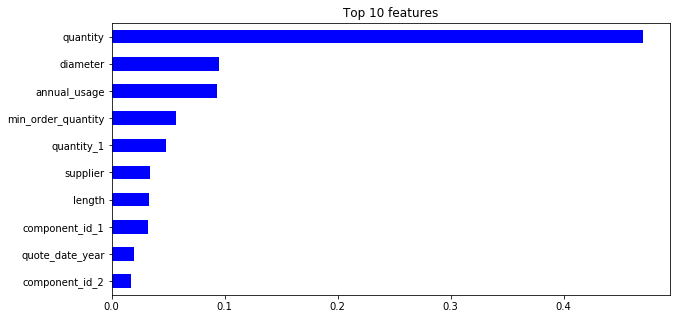

In [118]:
import matplotlib.pyplot as plt 

rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

## Submission

In [0]:
test_wrangled = wrangle(test)
X_test = test_wrangled.drop(columns='id')
all(X_test.columns == X_train.columns)

In [0]:
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['cost'] = y_pred
submission.to_csv('submission-01.csv', index=False)